In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,GRU
from keras.optimizers import SGD

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print(dataset_train.shape)
training_set = dataset_train.iloc[:, 1:2].values

(1258, 6)


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

<AxesSubplot: >

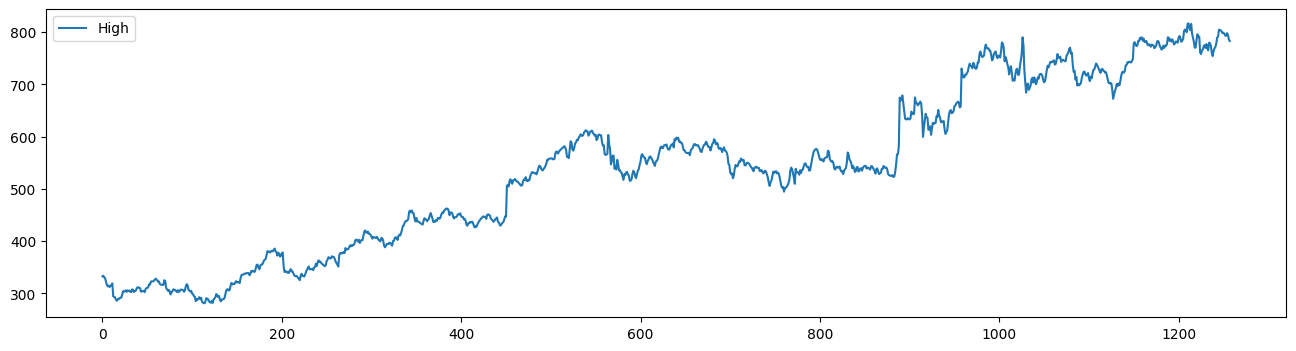

In [4]:
dataset_train["High"].plot(figsize=(16,4),legend=True)

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
regressorGRU = Sequential()

In [7]:
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [8]:
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [9]:
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [10]:
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [11]:
regressorGRU.add(Dense(units=1))

In [12]:
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Epoch 1/50


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 5s 89ms/step - loss: 0.1678
Epoch 2/50
8/8 [==============================] - 1s 90ms/step - loss: 0.0918
Epoch 3/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0580
Epoch 4/50
8/8 [==============================] - 1s 85ms/step - loss: 0.0376
Epoch 5/50
8/8 [==============================] - 1s 85ms/step - loss: 0.0223
Epoch 6/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0110
Epoch 7/50
8/8 [==============================] - 1s 88ms/step - loss: 0.0066
Epoch 8/50
8/8 [==============================] - 1s 90ms/step - loss: 0.0058
Epoch 9/50
8/8 [==============================] - 1s 88ms/step - loss: 0.0051
Epoch 10/50
8/8 [==============================] - 1s 90ms/step - loss: 0.0046
Epoch 11/50
8/8 [==============================] - 1s 88ms/step - loss: 0.0039
Epoch 12/50
8/8 [==============================] - 1s 90ms/step - loss: 0.0044
Epoch 13/50
8/8 [==============================] - 1s 92ms/step - loss: 

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31240\3626125501.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [14]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 714ms/step


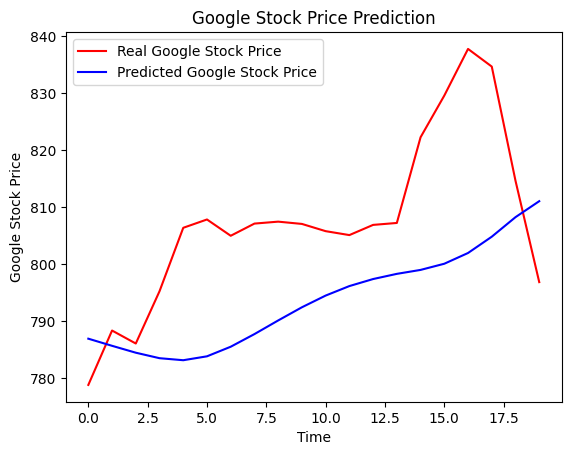

In [15]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()